<a href="https://www.kaggle.com/code/dipak777/gender-detection?scriptVersionId=223018641" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


# Importing Libraries and Modules


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers, initializers
import os
import numpy as np
import matplotlib.pyplot as plt


# Setting Up Dataset Directories


In [2]:
# Define the base directory where datasets are stored
base_dir = "/kaggle/input/dataset/dataset1"

# Define train and validation directories
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "validation")

# Print paths to verify
print("Train Directory:", train_dir)
print("Validation Directory:", val_dir)


Train Directory: /kaggle/input/dataset/dataset1/train
Validation Directory: /kaggle/input/dataset/dataset1/validation


# Data Augmentation and Data Loading


In [3]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,      
    horizontal_flip=True,   
    rotation_range=10,      
    zoom_range=0.1          
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0) 

# Load datasets with optimized settings
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  
    batch_size=16,           
    class_mode="binary"
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode="binary"
)

print("Class indices:", train_generator.class_indices)


Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.
Class indices: {'female': 0, 'male': 1}


# Building and Compiling the Model


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers, initializers
from tensorflow.keras.optimizers import Adam

regularizer = regularizers.l1(0.001) #Adds a penalty to the loss function to prevent overfitting.
initializer = initializers.HeNormal(seed=20) #Initializes weights efficiently for ReLU activation.

#To artificially increase dataset size and improve model generalization.
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),  
    tf.keras.layers.RandomRotation(0.1),  
    tf.keras.layers.RandomZoom(0.1),
], name="data_augmentation")


model = Sequential([
    tf.keras.layers.InputLayer(input_shape=(128, 128, 3)),  # Explicitly define input shape
    data_augmentation, 

    Conv2D(64, (3,3), activation="relu", kernel_initializer=initializer, kernel_regularizer=regularizer),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation="relu", kernel_initializer=initializer, kernel_regularizer=regularizer),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.3),
    Dense(1)  
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),  
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),  
    metrics=['accuracy']
)

# Print Model Summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)       │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 126, 126, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       7,373,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,393,953 (28.21 MB)

 Trainable params: 7,393,761 (28.20 MB)

 Non-trainable params: 192 (768.00 B)

# Defining Callbacks for Model Training


In [5]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint(
    "gender_prediction_model_best.keras",  
    save_best_only=True,  
    monitor="val_accuracy",  
    mode="max",  
    verbose=1
)

early_stopping = EarlyStopping(
    monitor="val_loss",  
    patience=3,  
    restore_best_weights=True  
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,  
    patience=2,  
    verbose=1
)


# Training the Model

In [6]:
history = model.fit(
    train_generator,
    epochs=5,  
    validation_data=val_generator,
    callbacks=[checkpoint, early_stopping, reduce_lr]  # Add callbacks here
)

model.save("/kaggle/working/gender_prediction_model.keras")


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2939/2939 ━━━━━━━━━━━━━━━━━━━━ 0s 517ms/step - accuracy: 0.8177 - loss: 1.5697
Epoch 1: val_accuracy improved from -inf to 0.92489, saving model to gender_prediction_model_best.keras
2939/2939 ━━━━━━━━━━━━━━━━━━━━ 1592s 540ms/step - accuracy: 0.8177 - loss: 1.5696 - val_accuracy: 0.9249 - val_loss: 1.0226 - learning_rate: 1.0000e-04
Epoch 2/5
2939/2939 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.8987 - loss: 1.0244
Epoch 2: val_accuracy improved from 0.92489 to 0.93536, saving model to gender_prediction_model_best.keras
2939/2939 ━━━━━━━━━━━━━━━━━━━━ 1602s 527ms/step - accuracy: 0.8987 - loss: 1.0244 - val_accuracy: 0.9354 - val_loss: 0.8449 - learning_rate: 1.0000e-04
Epoch 3/5
2939/2939 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step - accuracy: 0.9129 - loss: 0.8620
Epoch 3: val_accuracy did not improve from 0.93536
2939/2939 ━━━━━━━━━━━━━━━━━━━━ 1571s 523ms/step - accuracy: 0.9129 - loss: 0.8620 - val_accuracy: 0.9326 - val_loss: 0.7698 - learning_rate: 1.0000e-04
Epoch 4/5
2939/2939 ━━━━━

# Evaluating the Model on Test Data


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

model = load_model("gender_prediction_model_best.keras")

test_dir = "/kaggle/input/test-data/test"  

test_datagen = ImageDataGenerator(rescale=1./255)  
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),  
    batch_size=32,
    class_mode='binary',
    shuffle=False  
)

loss, accuracy = model.evaluate(test_generator)
print(f"\n📊 Test Accuracy: {accuracy * 100:.2f}%")
print(f"📉 Test Loss: {loss:.4f}")


Found 1020 images belonging to 2 classes.
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 224ms/step - accuracy: 0.9134 - loss: 0.7791

📊 Test Accuracy: 92.94%
📉 Test Loss: 0.7129


# Random Image Prediction and Visualization


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


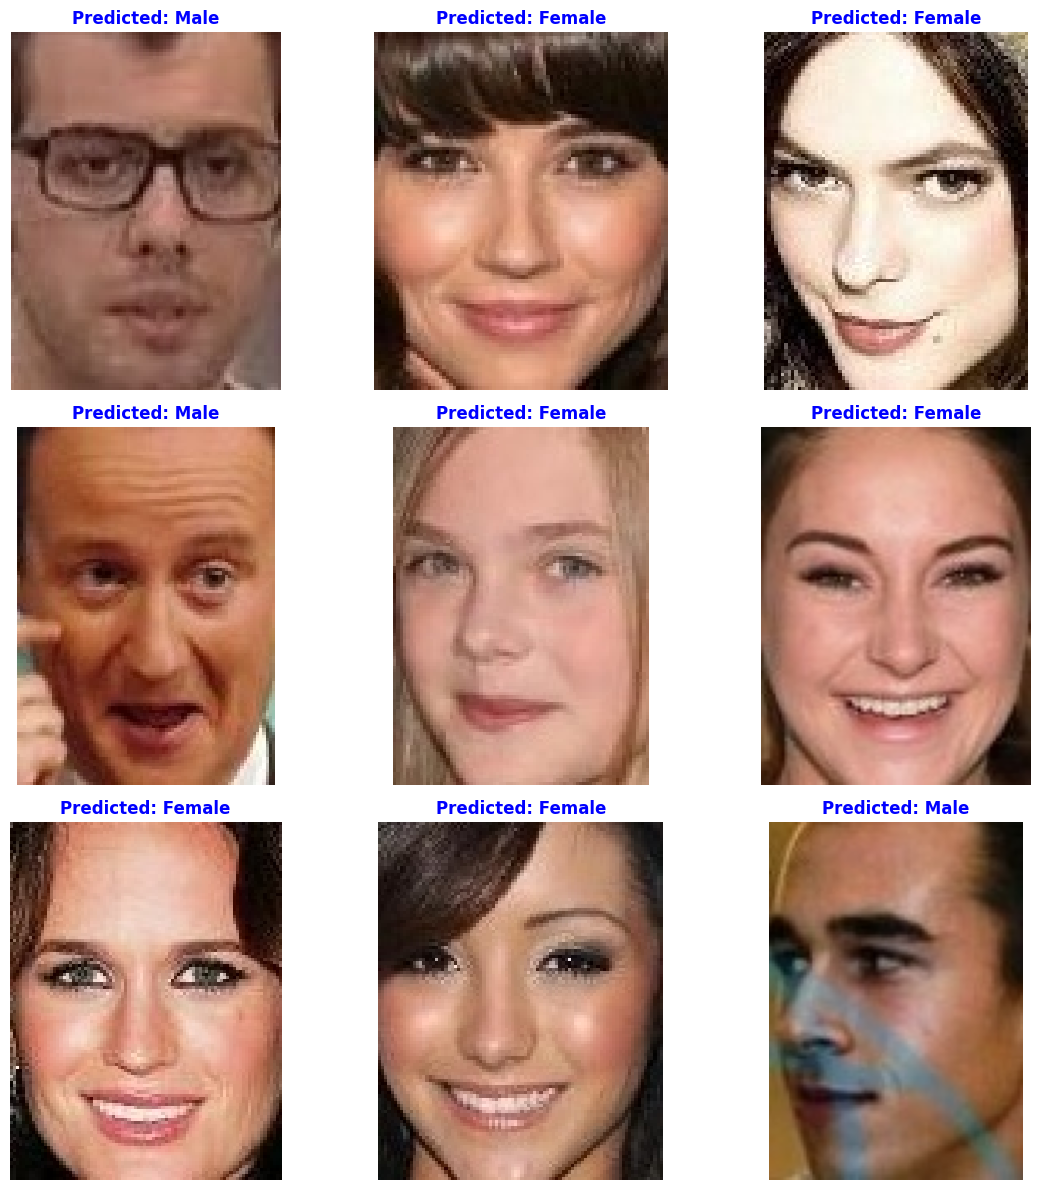

In [8]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

model = load_model("gender_prediction_model_best.keras")

def preprocess_image(image_path):
    img = cv2.imread(image_path)  
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    img_resized = cv2.resize(img, (128, 128))  
    img_normalized = img_resized / 255.0 
    img_expanded = np.expand_dims(img_normalized, axis=0)  
    return img, img_expanded  

def predict_and_visualize(image_path, ax, index):
    original_img, processed_img = preprocess_image(image_path)  
    
    prediction = model.predict(processed_img)[0][0]
    gender = "Male" if prediction > 0.5 else "Female"

    ax.imshow(original_img)
    ax.axis("off")  # Hide axes
    ax.set_title(f"Predicted: {gender}", fontsize=12, fontweight="bold", color="blue")

test_dir = "/kaggle/input/test-data/test"

male_images = [os.path.join(test_dir, "Male", img) for img in os.listdir(os.path.join(test_dir, "Male"))]
female_images = [os.path.join(test_dir, "Female", img) for img in os.listdir(os.path.join(test_dir, "Female"))]

all_images = male_images + female_images

random_images = random.sample(all_images, 9)

fig, ax = plt.subplots(3, 3, figsize=(12, 12))

ax = ax.flatten()

for i in range(9):  
    predict_and_visualize(random_images[i], ax[i], i)

plt.tight_layout()  
plt.show()
